# Part II - (Presentation Title)
## by (Victor Enyinnaya Orji)




## Investigation Overview

Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 12-month ride trips data in 2018. 


## Dataset Overview
The dataset used for this exploratory analysis consists of **monthly individual trip data** from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv('fordgobike_trips_2018_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Usage by hours during Weekdays for Customers and Subscribers

Different usage patterns/habits between the two types of riders are clearly seen. Subscribers used the system heavily on weekdays i.e. Monday through Friday, whereas customers ride a lot on weekends, especially in the afternoon. Many trips were around 8-9am and 17-18pm on weekdays for subscribers who used for work commute, yet casual customers tended to use more in the late afternoon around 17pm Monday to Friday. Other than the different usage goals, it may also have to do with the traffic situation around these rush hours in the area.

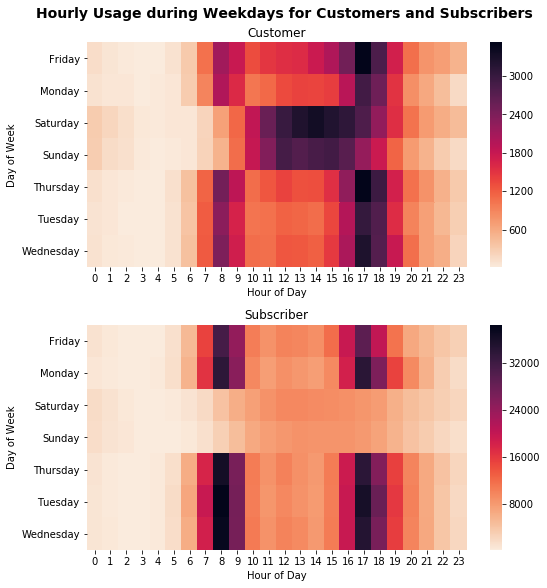

In [3]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = df_cleaned.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_day_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_day_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_cleaned.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_day_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_day_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);



## The two types of Users and Their Monthly Usage

Subscribers contributed the majority of the bike usage in 2018, about 89%, while about 11% were consumed by cusomters (or casual users). Both subscribers and customers ride the most during the summer months with subscribers maxed out in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January likely due to the weather.

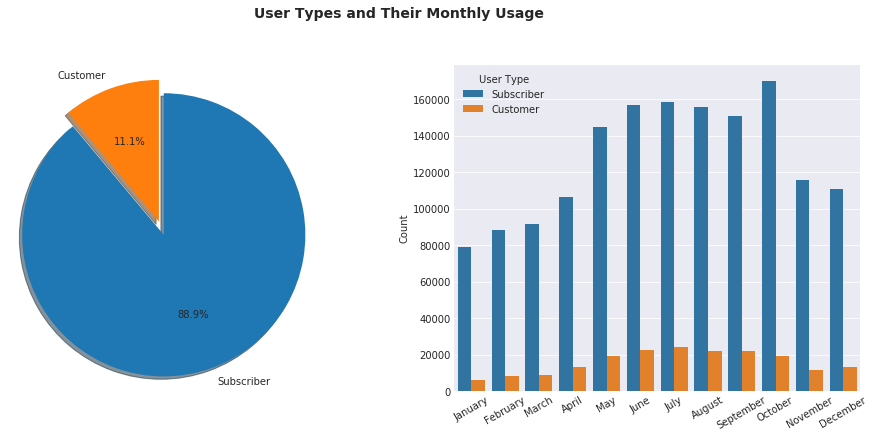

In [4]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df_cleaned.user_type.value_counts()/df_cleaned.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df_cleaned, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

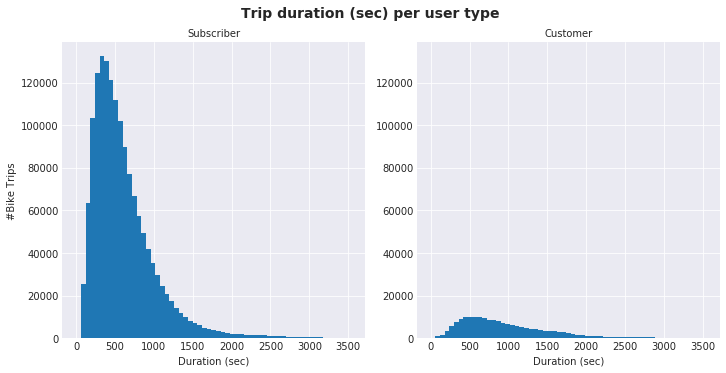

In [5]:
# code for the (histogram) duration (sec) distribution per user type

base_color = sb.color_palette()[0]

g = sb.FacetGrid(df_cleaned, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) per user type', y=1.03, fontsize=14, fontweight='semibold');

**Alternatively**




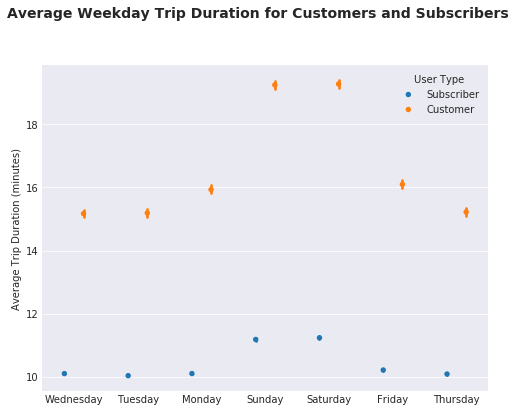

In [6]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data=df_cleaned, x='start_weekday', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## SUMMARY

There was a lot more subscribers using the bike sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. Obviously different usage patterns and riding habits are observed between the two types of riders. Subscribers used the system heavily on work days concentrated around 8-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
